# Another Quick Win: Loading and Graphing Tabular Data in Python 

## In this section

In this section, we will learn how to:

- Understand the Tidy format for tabular data
- Understand how comma separated values (.csv) and tab-separated values (.tsv) files store tabular data, like in an Excel sheet, in a simple plain-text format
- Learn how to Tidy format comma separated values or tab-separated values files into python using pandas DataFrames.
- Extract columns from a Pandas DataFrame and convert them to python `list` objects
- Connect what you've learned here to the last lesson by using lists you loaded from a data file for making scatterplots, boxplots, or running stats. 


## Prerequisites

- Have **Anaconda python installed**, and be able to run it
- Understand how to **assign varaibles** in python (e.g. x = 7)
- Understand how to **call functions** like `print` in python (e.g. `print("Hello World!"))
- Understand **relative paths** (like `./Data/my_data.txt` and **absolute paths** (like `/Users/zaneveld/Downloads`) on the command line, so that you can get a data file into the same working directory as you are running python from.
- It's helpful to have completed the 'A Quick Win' chapter and have an example of how to **make scatterplots**  given python `list` objects like `x = [0,1,1,5,17,24,57]` or `y = [2,12,12,50,168,246,572`.

## Review of assigning data to python lists.

So far, we've discussed working on the command line, opening python, and using some basic features of python coding including assigning variables, for example `greeting="Heya!"`, calling functions, e.g. `boxplot(data,labels=treatments)`, holding data in lists, e.g. `gene_lengths = [3125,2745,3007,5678,3144])`, and using functions to make scatter and boxplots.

In the `A quick win` chapter, we started with our data in lists, already written out by hand as numbers. For example, before we made a boxplot we wrote out code like that below to build lists of x and y data and assign them to variables for later reference:

In [2]:
#Make a list of the size of each control plant in centimeters
control_plant_sizes = [4,7,9,3,4,1,1]

#Make a list of the size of each treatment plant in centimeters
treatment_plant_sizes = [5,4,10,8,5,9,9]

Recall that everything after the `#` is a comment, and won't be 'read' by python. It's just to help us humans understand what the code does. This code creates two lists of numbers and assigns them to the control_plant_sizes and treatment_plant sizes variables. Remember that in variable names we have to use underscores instead of spaces (`control_plant_sizes` not `control plant sizes`) because python variables can only be one word long.

**Stop and try it yourself**: Open python, create two lists of numbers and assign each to variables. Make the variable names and the actual numbers different from those up above. Use the `print` function to print both lists out to the screen. If you were going to make a scatterplot out of these data, do you think the lists would have to be the same length?

## Untidy data is harder for computers to process

In practice, we rarely or never directly type data into a python interpreter or python script. Instead, these data are typically held in separate data files, which are then read into python to conduct analysis or make graphs. Therefore, it's worth discussing some typical, standard ways of organizing data so that it will be easy to read into python.

There are many possible ways of organizing data. As humans we are very good at making inferences about the meaning of data when it is not structured in a standard way. However, these kinds of inferences are much harder to accomplish with traditional programming techniques.



### Example messy data on *Nematostella* growth and survivorship

<img src="./resources/Nematostella_icon_full_grown.png" width="100" align = "left" br clear="left" description="A silhouette of a Nematostella anemone. It has tentacles at the top, and a thin body below.">Take a moment to look at the spreadsheet below, which describes some data on survivorship and growth of *Nematostella vectensis* under either control or treatment conditions, as part of an investigation into the potential role of symbiotic bacteria in potentially promoting growth. (A silhouette of an adult *Nematostella* is to the left, if you were curious what they looked like).

<img src="./resources/untidy_data.png" width="1000"  description="A picture of data in an Excel spreadsheet. The data are not in Tidy format. Instead, two data series are separated on the sheet. The number '187' is highlighted in the first series. The first entry in the first series is labelled 'antibiotics' in the first cell, but not any of the below cells.">

Pay particular attention to the number `187.23` highlighted in yellow. Based on this sheet, would you guess that this length measurement come from the control or antibiotics treatment? How sure are you of this conclusion?

For a human reader able to look at this spreadsheet, it may be clear that everything in the left block of data is intended to reflect survivorship or growth in the antibiotic treatment, while everything in the right block refers to control. However, computers are not nearly as good at processing untidy data.

### Tidy data is much easier to work with in `python`.

There are many structured formats for data. One of the most important ones in bioinformatics is the [Tidy](https://vita.had.co.nz/papers/tidy-data.pdf) format. In the Tidy format, data are *structured* in a specific way to reduce ambiguity and allow easy processing in programming languages like python and R. 

In Tidy datasets, each column represents a single *variable*. Each row represents a single *observation*. The contents of each cell represent a measurement or value for that variable in that observation. Our example dataset could be rearranged into Tidy format as shown below:

#### Tidy data on *Nematostella* growth and survivorship

<img src="./resources/tidy_data.png" align="center" width="400"  description="A picture of data in an Excel spreadsheet. The data are not in Tidy format. Instead, two data series are separated on the sheet. The number '187' is highlighted in the first series. The first entry in the first series is labelled 'antibiotics' in the first cell, but not any of the below cells.">

In this Tidy representation of the data, each row represents one measurement or replicate, and each column represents a specific measurement of survivorship or growth. Look again at the number `187.23`. It should now be unambiguously clear that this growth measurement was collected under antibiotic treatment conditions, because the 'treatment' column states this.

The Tidy format can be counter-intuitive at first, because it requires duplication of some data, such as repeated entries stating that a particular row is from either antibiotic or control conditions. However, notice how this small increase in the amount of text (and storage space), vastly reduces ambiguity of the meaning of the data. Therefore **Tidy format is ideal for many common types of tabular data for analysis in python**.

#### Storying Tidy format data in comma-separated values (`.csv`) or tab-separated values (`.tsv`) files

While it is possible to directly read in Excel files into python, it is more common to store tabular data in Tidy format as a simple text file. In order to preserve information about which text or numbers go in which column, text-based tabular formats insert special characters. Typically, these are either commas (`,`) or tab characters (tabs appear as white space, but is written out as `'\t'` in python). If commas are used, the file becomes a comma-separated values (`.csv`) file, whereas if tab characters are used, the file becomes a tab-sepeated values file (`.tsv` or sometimes `.txt`)

**Example 1**:

The first row (which has the headers) in a `.csv` file would become:
`treatment,survivors,length in mm`

The second row of our Tidy data, translated into a `.csv` file would become:
`antibiotics,0,303.6666667`

**Example 2**:

In a `.tsv` file would become:

`treatment\tsurvivors\tlength in mm`

However, the \t characters would be translated into tabs when viewed:

`treatment survivors length in mm`

Finally, the second row of our Tidy data, translated into a `.tsv` file would become:

`antibiotics\t0\t303.6666667`

and appear as

`antibiotics 0 303.6666667`


## Loading Tidy format data into Python from a comma-separated values (`.csv`) file


Now that we have an understanding of the Tidy format, and what a `.csv` file is, let's see how to load columns of data from a Tidy-format `.csv` file into python, and get out lists of data.

In order to have something to work with, we will need an example `.csv` file. A much larger example `.csv` file is linked below. You can click on the link, then right-click (or on Mac two-finger click) the button marked 'raw' on GitHub to download the file.

[nematostella_data.csv](./nematostella_data.csv)

**Take a moment to download this data, taking careful note of where it is on your sytem. It will typically download by default to your `Downloads` folder.**

In most real datasets, there will be many columns of data, and it may not always be obvious what each means. In addition to the Methods section of a paper, often a "data dictionary" is provided as a seperate file which maps each column name to a text description of what that column represents. While not necessary to complete the exercise, a data dictionary for this data is available at the link 

[nematostella_data_dictionary.csv](./nematostella_data_dictionary.csv)

## Import the pandas package 

`pandas` is a python library for loading and working with tabular data, such as that in our `.csv` files. `pandas` is not a part of python itself, but is bundled and installed along with python in Anaconda python (the python distribution we installed in this text). If you didn't install Anaconda python, you may need to separately install pandas to follow along.

The `read_csv` function in pandas allows you to read a `.csv` file, and load it into python as a `DataFrame` object - essentially a table.

We will import the `read_csv` function from `pandas` using exactly the same syntax as we previously used to import functions like `boxplot` and `scatter` from `matplotlib` when we were making boxplots or scatterplots.



In [ ]:
#import the read_csv function from pandas
from pandas import read_csv

## Load the Nematostella data

We're now going to use the `read_csv` function to load the *Nematostella* data. 

*Hint:* the hard part here is making sure your data file is in the same current working directory as the one you ran your jupyter notebook from. If it isn't, this will cause the code below to produce a FileNotFound error (since the file isn't in the current folder!). This error will also happen if there is any kind of typo in the name of the file, since python will not try to guess that the two files are the same. If this happens, see Troubleshooting, below, for some ways we can use python to list what's in your current folder and check the spelling of the file, as well as to figure out which directory is your current working directory.

*Hint 2*: The code below has to be run in python, ideally inside a jupyter notebook. It won't work if you try to run it directly on the command line.

*Hint 3*: If you want to use this method with a `.tsv` file, you would set the separator or `sep` paramter of the read_csv function to the tab (`\t`) character, like this: `data = read_csv("nematostella_data.csv",sep="\t")`

In [22]:
#run the read_csv function 
data = read_csv("nematostella_data.csv")

#Just typing the name of the variable is enough to show the data once it was loaded within a Jupyter Notebook
data


,#SampleID,date,dpf,Microscope/ Camera/Objective/ Calibration,sample_type,plate,current_antibiotic_dose,well_Id,egg_sack_id,water_type,...,total_with_tentacle,total_unhealthy,unhealthy_nematostella_notes,photo_filename,average_length,stdev_length,FISH_sample_id,16S_sample_id,flikr link,remaining_nematostella
0,NV_FL_G1_R_111617_A2_E2,11/16/17,52.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Rescue,None,A2,E2,1.5ml autoclaved ASW+500ul ASW from correspond...,...,0,1.0,fragmented pieces,NV_FL_G1_R_111617_A2_E2.png,93.500000,132.2289681,None,None,Unknown,NaN
1,NV_FL_G1_R_020118_B4_E2,2/5/18,130.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Gentamycin_Rescue,None,B4,E2,autoclaved ASW,...,0,1.0,NaN,NV_FL_G1_R_020118_B4_E2.png,128.300000,181.4436001,None,None,Unknown,1.0
2,NV_FL_G1_C_111617_C4_E6,11/16/17,52.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Control,None,C4,E6,autoclaved ASW (minus 500ul) +500ul fresh Auto...,...,0,1.0,NaN,NV_FL_G1_C_111617_C4_E6.png,131.400000,None,None,None,Unknown,1.0
3,NV_FL_G1_C_112917_B4_E2,11/29/17,68.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Control,None,B4,E2,autoclaved ASW (minus 500ul) +500ul fresh Auto...,...,1,0.0,NaN,NV_FL_G1_C_112917_B4_E2.png,135.500000,None,None,None,Unknown,1.0
4,NV_FL_G1_R_020818_A3_E3,2/8/18,138.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Gentamycin_Rescue,None,A3,E3,autoclaved ASW,...,0,1.0,NaN,NV_FL_G1_R_020818_A3_E3.png,137.850000,194.9493396,None,None,Unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,NV_FL_G1_C_112917_C4_E6,11/29/17,68.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Control,None,C4,E6,autoclaved ASW,...,3,0.0,NaN,NV_FL_G1_C_112917_C4_E6.png,756.666667,248.1135493,None,None,Unknown,3.0
332,NV_FL_G1_G_112117_A4_E4,11/21/17,59.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Gentamycin,None,A4,E4,autoclaved ASW,...,1,0.0,NaN,NV_FL_G1_G_112117_A4_E4.png,763.600000,None,None,None,Unknown,1.0
333,NV_FL_G1_G_112917_B2_E6,11/29/17,68.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Gentamycin,None,B2,E6,autoclaved ASW,...,1,0.0,NaN,NV_FL_G1_G_112917_B2_E6.png,767.500000,None,None,None,Unknown,1.0
334,NV_FL_G1_G_112917_A4_E4,11/29/17,68.0,NikonSMZ1500/DSRi1/ 1X by 1Xzoom ratio/0.5cm=5...,measurement in um,Gentamycin,None,A4,E4,autoclaved ASW,...,1,0.0,NaN,NV_FL_G1_G_112917_A4_E4.png,779.200000,None,None,None,Unknown,1.0


### Troubleshooting `FileNotFound` errors

The hardest part of loading data into python usually isn't actually the python part. Instead, it's understanding how to get a file into your current working directory. Therefore, the most common error you will get is due to the file not actually being in the same current working directory as you ran python from. This can also happen if you have a typo in the filename. 

For example, if you were to try to run read_csv on a file called `nematostella_dataaa.csv` (with extra `a`s in `data`), you would get a long error message, ending with: 
    `FileNotFoundError: [Errno 2] No such file or directory: 'nematostella_dataaa.csv'`

### Double checking the contents of your current working directory

To double check the correct spelling of the filename, you can run the code below to import the function `listdir` from pythons built in `os` module, and use it to double check that the file you want to open is really in the list of files from your current directory. 

Remember that any lines that start with a pound sign or hashtag symbol (`#`) are just comments, and not anything you have to type into python

In [23]:
#Import the list directory or listdir function
from os import listdir

#Run listdir and assign the list of filenames to a variable called
#current_files
current_files = listdir()

#Check that 'nematostella_data.csv' is in the list of files
#(It might be hard to spot if the list is super long)
print("The files in the current directory are:", current_files)

The files in the current directory are: ['untidy_data_example.csv', '.DS_Store', 'exercise_answers_exploring_python_data_types.ipynb', 'tidy_data_example.csv', 'resources', 'another_quick_win.ipynb', 'A_Tour_of_Python_Syntax.ipynb', 'a_quick_win.ipynb', 'error_messages_in_python.ipynb', 'nematostella_data.csv', 'nematostella_data_dictionary.csv', 'exploring_python.ipynb', 'exploring_python_data_types.ipynb', 'template.ipynb', '.ipynb_checkpoints', 'exercise_error_bingo.ipynb']


If `nematostella_data.csv` is *not* in your current directory, you can figure out what your current directory is using the code below, then move it or re-download it into that directory by hand outside of python:

In [24]:
from os import getcwd
current_dir = getcwd()
print("The current directory is:",current_dir)

The current directory is: /Users/zaneveld/Dropbox/Zaneveld_Lab_Organization/Projects/Full_Spectrum_Bioinformatics/full_spectrum_bioinformatics/content/04_exploring_python


This is the absolute path for your directory. Using what you know about absolute paths, you should now be able to open this folder in your finder, and make sure you've downloaded the file into it (or move it there if you put it somewhere else)

## Extracting data from the pandas dataframe

If you were able to load the data and see a table, the hardest part is done! From here, only a few lines of code are needed to take columns of the `pandas` `DataFrame` object and convert them to basic python lists, similar to those that we used in the previous `quick win` section.

We will later more comprehensively discuss pandas DataFrames and how to filter them, combine data across multiple tables, etc. For now, we need only to know two things:

1. We can extract a column from a pandas DataFrame by following the name of the variable that holds the dataframe with square brackets containing a string with the name of the column you want. That sounds like a lot, but is simple enough when written out: `day = data['dpf']`.

2. The resulting object is a pandas `Series` object. By calling the `list` function, we can convert this `Series` object into a standard python list. For example: `day = list(day)`.

Let's try applying these two steps to our data to extract the `dpf` column, which holds time information on how many 'days post fertilization (dpf)' each observation was taken at. We'll then repeat the process to extract information on how large the average *Nematostella* was from the `average_length` column:

In [25]:
#Extract the 'dpf' column from our DataFrame (i.e. the 'data' variable)
#and save it in the day variable
day = data['dpf']

#Convert the column data to a list, and assign that list to the day variable
day = list(day)

print("Days post fertilization:", day)

Days post fertilization: [52.0, 130.0, 52.0, 68.0, 138.0, 59.0, 138.0, 59.0, 52.0, 68.0, 8.0, 52.0, 112.0, 149.0, 52.0, 21.0, 4.0, 4.0, 130.0, 130.0, 4.0, 4.0, 17.0, 59.0, 4.0, 68.0, 4.0, 21.0, 4.0, 149.0, 149.0, 138.0, 8.0, 12.0, 4.0, 4.0, 4.0, 8.0, 12.0, 8.0, 4.0, 138.0, 52.0, 4.0, 4.0, 8.0, 4.0, 8.0, 4.0, 4.0, 4.0, 8.0, 4.0, 138.0, 8.0, 59.0, 8.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 138.0, 8.0, 4.0, 68.0, 130.0, 4.0, 4.0, 4.0, 21.0, 17.0, 112.0, 8.0, 8.0, 8.0, 8.0, 8.0, 17.0, 8.0, 8.0, 112.0, 4.0, 8.0, 4.0, 8.0, 4.0, 8.0, 12.0, 4.0, 4.0, 12.0, 8.0, 8.0, 130.0, 12.0, 4.0, 8.0, 8.0, 8.0, 149.0, 8.0, 112.0, 8.0, 112.0, 12.0, 21.0, 12.0, 8.0, 8.0, 8.0, 8.0, 12.0, 8.0, 8.0, 130.0, 149.0, 8.0, 12.0, 149.0, 17.0, 21.0, 12.0, 149.0, 59.0, 12.0, 138.0, 130.0, 12.0, 8.0, 52.0, 12.0, 12.0, 149.0, 112.0, 68.0, 17.0, 149.0, 68.0, 138.0, 59.0, 17.0, 12.0, 68.0, 130.0, 12.0, 21.0, 112.0, 138.0, 149.0, 59.0, 59.0, 112.0, 138.0, 68.0, 12.0, 138.0, 59.0, 17.0, 12.0, 12.0, 12.0, 21.0, 21.0, 1

In [26]:
#Extract the 'average_length' column from our DataFrame (i.e. the 'data' variable)
#and save it in the day variable
length = data['average_length']

#Convert the column data to a list, and assign that list to the day variable
length = list(length)

print("Average length:", length)

Average length: [93.5, 128.3, 131.4, 135.5, 137.85, 138.9, 143.4333333, 143.7, 144.7, 151.8, 163.4857143, 165.4, 168.4, 168.6, 175.2666667, 176.5, 177.95, 180.6625, 187.2333333, 190.55, 193.775, 194.15, 194.9, 197.9, 200.6625, 201.1, 202.825, 203.6, 204.8125, 205.4, 205.7, 208.0, 209.65, 212.0, 212.05, 212.1375, 213.775, 214.7714286, 216.2666667, 216.3285714, 216.4125, 216.45, 217.0, 217.175, 218.2125, 218.5, 218.8125, 219.2714286, 219.5714286, 219.875, 219.9, 220.9428571, 221.05, 221.3, 223.2428571, 224.1, 224.2857143, 225.2625, 225.3285714, 225.6714286, 225.8875, 226.2375, 226.3, 226.6125, 227.0666667, 227.325, 227.5, 228.4714286, 228.525, 229.7, 229.7, 229.9875, 230.025, 230.6, 230.8333333, 230.9666667, 232.8, 232.9, 234.3428571, 234.7, 235.4285714, 235.7142857, 237.875, 237.9571429, 238.0714286, 239.0, 239.3857143, 240.25, 241.425, 241.6142857, 241.8, 241.9666667, 242.3, 242.5875, 243.9, 244.95, 245.25, 246.3142857, 246.7333333, 246.78, 246.9875, 247.4714286, 247.5857143, 248.05714

**Stop and check:** if there are any non-numerical data in the list, later steps won't work. That shouldn't happen with this example data, but is very likely in real data. Later, we will learn how to filter pandas DataFrames within python to remove rows with non-numeric or missing data. For now, if you encounter this issue in your own data, you can make a 'clean' version by saving the datasheet, and deleting all columns that are not key to your analysis, then deleting rows that have missing data for your `x` or `y` variables. Finally, you would reload the data again with `read_csv`.

### Make a simple scatterplot in matplotlib


Now that we have our key biological variables We will have to import a few functions from `matplotlib.pyplot` that we will need to make our graph. `scatter` is the function for making the scatterplot, while `xlabel` and `ylabel` are functions for setting the x and y axis labels.

Text(0, 0.5, 'Average Nematostella length (mm)')

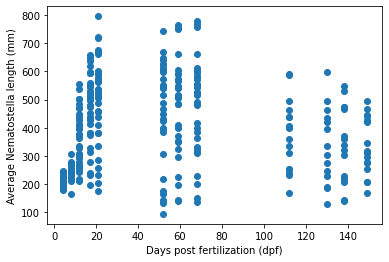

In [33]:
from matplotlib.pyplot import scatter, xlabel, ylabel

scatter(day,length)
xlabel("Days post fertilization (dpf)")
ylabel("Average Nematostella length (mm)")

**Stop and think**: Up to 20 days post fertilization, do the *Nematostella* appear to be growing? What about after 20 dpf?

## Running a simple linear regression in python

As we saw in the previous 'Quick Win' chapter, the function `pearsonr` from the `scipy.stats` module will perform a Pearson regression. This take two lists of numbers, and tests whether the values of the first list are correlated with the corresponding values in the second list. As before, a Pearson regression is useful in comparing two continuous variables against each other, to see if they might be positively or negatively correlated.

Since we have some data on the size of our *Nematostella* linked to particular points in time (measured in days post-fertilization), we can test whether they grew larger over the course of the experiment. 

Here's a complete example:

In [30]:
#Import the pearsonr function 
from scipy.stats import pearsonr

#We should already have our data in the day and length varaibles, so we do not need to 
#type out these lists by hand.

#Run pearson regression, and assign the results to the variables R2 and pvalue
R2, pvalue = pearsonr(day,length)

#Print the results
print("R2:",R2)
print("pvalue:",pvalue)

R2: 0.06744491167800551
pvalue: 0.21754481322035318


The Pearson regression produces two values. The R-squared (R2) value represents the proportion of the variation in the y variable that is explained by the value of the x variable. So in this case, 6.7% of the variation in the length of our *Nematostella* can be explained by growth over time.

The p-value represents the chances of getting this strong of a pattern by chance. In the case of Pearson regression 'by chance' means under the null hypothesis of a flat relationship between the x and y variables (i.e. increasing x does not increase y on average).  In our case we get a p-value of 0.2175. This means it would be quite possible — about a 22% chance — that any apparent increase in size we see over the whole experiment could as easily happen under the null hypothesis of no relationship. Because 22% is much more than 5%, this means that the relationship between time and Nematostella length would not be considered statistically significant.

## Exercises

1. **Respond to the following interpretation of the data**: "Our results show no statistical significance. Therefore, we have ruled out the possibility that *Nematostella* anemones grow over time after fertilization". Do you agree or disagree with this interpretation? Why?

2. **Examine the graph showing *Nematostella* length over time.**. Does the pattern seem consistent, or do there seem to be contrasting patterns at different points in time?

3. **Test whether *Nematostella* growth patterns differ before and after 20 dpf**. Open the `nematostella_data.csv` file, and save a copy called `nematostella_data_to_20dpf.csv`. In that copy, sort the data by days post fertilization in Excel or Google sheets. Then, save the data to a `.csv` in the same folder as the original data file, and try loading it up by adapting the code above. As before, plot a scatterplot and run a Pearson regression to compare days post fertilization against length. Up to 20 days post fertilization, is Nematostella length increasing over time?

4. The opacity (opposite of transparency) of points in a matplotlib scatterplot can be adjusted using the `alpha` parameter to the `scatter` function. `alpha` takes a number between 0.0 and 1.0, with 1.0 being totally opaque (= solid, not see-through) and 0.0 being invisible. Try rerunning the scatter function with alpha = 0.25, like this: `scatter(day,length,alpha = 0.25)`. Then, experiment a little with different opacities. What, if anything does making the data points more transparent reveal about the *density* of the data? What alpha values seems best in this case? If you had thousands of data points on a graph, how do you suppose changing the opacity of your scatterplot points might change reader's ability to make sense of the graph?  


## Reading Responses & Feedback 

^Make this a hyperlink using Google Forms

## Further Reading

## References